In [ ]:
import pandas as pd
import numpy as np
import sklearn
import random

In [ ]:
import sys, numpy as np
from keras.datasets import mnist # загрузка рукописных цифр

In [ ]:
# Теперь загрузим обучающий и тестовый наборы в отдельные переменные
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


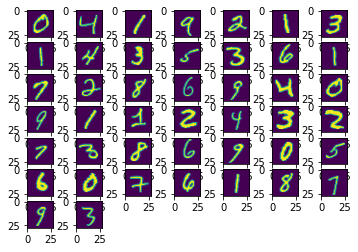

In [ ]:
import matplotlib.pyplot as plt
for i in range(1,45):
  plt.subplot(7,7,i)
  plt.imshow(x_train[i]) # используется для вывода картинок (матрицы)

In [ ]:
images = x_train[0:1000].reshape(1000,28*28) / 255
labels = y_train[0:1000]

In [ ]:
images.shape

(1000, 784)

In [ ]:
one_hot_labels = np.zeros((len(labels),10))
one_hot_labels

In [ ]:
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

In [ ]:
labels.shape

(1000, 10)

In [ ]:
test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))

In [ ]:
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

________________________________________________________________________________

In [ ]:
np.random.seed(l)
relu = lambda x:(x>=0) * x
relu2deriv = lambda x: x>=0
alpha, iterations, hidden_size, pixels_per_image, num_labels = \
(0.005, 350, 40, 784, 10)
weights_0_l = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_l_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

In [ ]:
for j in range(iterations):
  error, correct_cnt = (0.0, 0)
  for i in range(len(images)):
    layer_0 = images[i:i+1]
    layer_l = relu(np.dot(layer_0,weights_0_l))
    layer_2 = np.dot(layer_l,weights_l_2)
    error += np.sum((labels[i:i+1] - layer_2) ** 2)
    correct_cnt += int(np.argmax(layer_2) == \
                        np.argmax(labels[i:i+l]))
    layer_2_delta = (labels[i:i+1] - layer_2)
    layer_l_delta = layer_2_delta.dot(weights_l_2.T)\
                        * relu2deriv(layer_l)
    weights_l_2 += alpha * layer_l.T.dot(layer_2_delta)
    weights_0_l += alpha * layer_0.T.dot(layer_l_delta)
  sys.stdout.write("\r"+ \
                     " I:"+str(j)+ \
                    " Error:" + str(error/float(len(images)))[0:5] +\
                    " Correct:" + str(correct_cnt/float(len(images))))


 I:349 Error:0.113 Correct:0.997

In [ ]:
if(j % 10 == 0 or j == iterations-l):
  error, correct_cnt = (0.0, 0)
  for i in range(len(test_images)):
    layer_0 = test_images[i:i+1]
    layer_l = relu(np.dot(layer_0,weights_0_l))
    layer_2 = np.dot(layer_l,weights_l_2)
    error += np.sum((test_labels[i:i+l] - layer_2) ** 2)
    correct_cnt += int(np.argmax(layer_2) == \
                        np.argmax(test_labels[i:i+l]))
sys.stdout.write(" Test-Err:" + str(error/float(len(test_images)))[0:5] +\
  " Test-Acc:" + str(correct_cnt/float(len(test_images))))
print()

 Test-Err:0.011 Test-Acc:0.0997


______________________________________________________________________________

# **Прореживание (дропаут)**

In [ ]:
images = x_train[0:1000].reshape(1000,28*28) / 255
labels = y_train[0:1000]

In [ ]:
one_hot_labels = np.zeros((len(labels),10))

In [ ]:
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

In [ ]:
test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))

In [ ]:
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

In [ ]:
import numpy, sys
np.random.seed(1)
def relu(x):
  return (x >= 0) * x

def relu2deriv(output):
  return output >= 0

alpha, iterations, hidden_size = (0.005, 300, 100)
pixels_per_image, num_labels = (784, 10)

In [ ]:
weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

_____________________________________________________________________

In [ ]:
for j in range(iterations):
  error, correct_cnt = (0.0,0)
  for i in range(len(images)):
    layer_0 = images[i:i+1]
    layer_1 = relu(np.dot(layer_0, weights_0_1))
    dropout_mask = np.random.randint(2,size = layer_1.shape)
    layer_1 *= dropout_mask * 2
    layer_2 = np.dot(layer_1,weights_1_2)

    error += np.sum((labels[i:i+1] - layer_2)**2)
    correct_cnt += int(np.argmax(layer_2) == \
                       np.argmax(labels[i:i+1]))
    layer_2_delta = labels[i:i+1] - layer_2
    layer_1_delta = layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)
    layer_1_delta *= dropout_mask

    weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
    weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
  if(j%10 == 0):
    test_error = 0.0
    test_correct_cnt = 0
    for i in range(len(test_images)):
      layer_0 = test_images[i:i+1]
      layer_1 = relu(np.dot(layer_0,weights_0_1))
      layer_2 = np.dot(layer_1, weights_1_2)
      test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
      test_correct_cnt += int(np.argmax(layer_2) == \
      np.argmax(test_labels[i:i+1]))
    sys.stdout.write("\n" + \
      "I:" + str(j) + \
      " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
      " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
      " Train-Err:" + str(error/ float(len(images)))[0:5] +\
      " Train-Acc:" + str(correct_cnt/ float(len(images))))


I:0 Test-Err:0.641 Test-Acc:0.6333 Train-Err:0.891 Train-Acc:0.413
I:10 Test-Err:0.458 Test-Acc:0.787 Train-Err:0.472 Train-Acc:0.764
I:20 Test-Err:0.415 Test-Acc:0.8133 Train-Err:0.430 Train-Acc:0.809
I:30 Test-Err:0.421 Test-Acc:0.8114 Train-Err:0.415 Train-Acc:0.811
I:40 Test-Err:0.419 Test-Acc:0.8112 Train-Err:0.413 Train-Acc:0.827
I:50 Test-Err:0.409 Test-Acc:0.8133 Train-Err:0.392 Train-Acc:0.836
I:60 Test-Err:0.412 Test-Acc:0.8236 Train-Err:0.402 Train-Acc:0.836
I:70 Test-Err:0.412 Test-Acc:0.8033 Train-Err:0.383 Train-Acc:0.857
I:80 Test-Err:0.410 Test-Acc:0.8054 Train-Err:0.386 Train-Acc:0.854
I:90 Test-Err:0.411 Test-Acc:0.8144 Train-Err:0.376 Train-Acc:0.868
I:100 Test-Err:0.411 Test-Acc:0.7903 Train-Err:0.369 Train-Acc:0.864
I:110 Test-Err:0.411 Test-Acc:0.8003 Train-Err:0.371 Train-Acc:0.868
I:120 Test-Err:0.402 Test-Acc:0.8046 Train-Err:0.353 Train-Acc:0.857
I:130 Test-Err:0.408 Test-Acc:0.8091 Train-Err:0.352 Train-Acc:0.867
I:140 Test-Err:0.405 Test-Acc:0.8083 Train-Er

In [ ]:
layer_0 = images[0:0+1]
layer_0

In [ ]:
layer_1 = relu(np.dot(layer_0,weights_0_l))
layer_1

array([[-0.        , -0.        , -0.        , -0.        , -0.        ,
         0.96137876, -0.        , -0.        ,  0.4475447 , -0.        ,
        -0.        ,  0.09080994, -0.        , -0.        ,  0.77729141,
        -0.        , -0.        ,  0.14979387, -0.        ,  0.03136913,
        -0.        ,  0.32689461, -0.        ,  0.00839297,  0.28539451,
        -0.        , -0.        , -0.        ,  0.73173468,  0.57830241,
        -0.        , -0.        ,  0.15801403,  0.02767989,  0.50265586,
         0.42896727, -0.        , -0.        ,  0.1993494 ,  0.48435736,
        -0.        ,  0.21198257, -0.        ,  0.08543931,  0.16612694,
         0.20975576, -0.        , -0.        ,  0.3750125 , -0.        ,
        -0.        , -0.        ,  0.12515079,  0.42470215, -0.        ,
         0.41362971, -0.        , -0.        ,  0.22555817, -0.        ,
        -0.        ,  0.17678111, -0.        ,  0.19472682,  0.92311452,
         0.50704309, -0.        ,  1.04712028,  0.1

In [ ]:
layer_1.shape

(1, 100)

In [ ]:
dropout_mask = np.random.randint(2,size = layer_1.shape)
dropout_mask

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]])

In [ ]:
layer_1 *= dropout_mask * 2

In [ ]:
layer_0 = images[0:0+1]
layer_1 = relu(np.dot(layer_0, weights_0_1))
dropout_mask = np.random.randint(2,size = layer_1.shape)
layer_1 *= dropout_mask * 2
layer_2 = np.dot(layer_1,weights_1_2)

error += np.sum((labels[i:i+1] - layer_2)**2)

In [ ]:
correct_cnt += int(np.argmax(layer_2) == \
                    np.argmax(labels[0:0+1]))

In [ ]:
correct_cnt

916